# Homework 4 (sharable w/o code) Solutions 
Shay Edition | Sh'dition if you will

In [1]:
# general imports
import numpy as np
from scipy import interpolate, signal
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io
import sys
import os
import seaborn as sns

# nelpy!
import nelpy as nel  
import nelpy.plotting as npl

/home/shayok/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.


In [2]:
#Shay's plot settings
%matplotlib inline
npl.setup()
npl.set_palette(npl.colors.cows)
npl.setup(font='Universalis ADF Std', font_scale=2, palette=npl.colors.cows, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':33, 'legend.fontsize': 20, 'ytick.labelsize': 20, 'xtick.labelsize': 20}))

(['galloway',
  'gelbvieh',
  'shorthorn',
  'hereford',
  'texas_longhorn',
  'jersey',
  'charolais',
  'brown_swiss',
  'holstein',
  'angus',
  'texas_aggie'],
 <ColorGroup at 0x7f38b9c51e48 with 11 colors>)

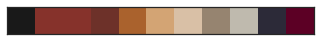

In [3]:
npl.colors.cows.color_names, npl.colors.cows # moo

In [4]:
data = np.load('SpikeData05.npz')
SpikeWaveforms = data['SpikeWaveforms']

# Problem 1

_Plot the spike peaks in 4-D space (10 pts)_

    Find the peak amplitude (post-threshold) of each snippet on each channel. If
    you look at some waveforms, you'll see that the peak typically happens
    within 5-10 data points of the threshold crossing (later peaks are noise!).
    Make a 6 subplot figure showing a point in each panel for each detected
    action potential. The point should be the peak amplitude on channel A vs the
    peak amplitude on channel B, where A and B are the combinatorial pairs
    within {1; 2; 3; 4} (i.e., 1 vs. 2, 1 vs. 3, etc.). Once you have found the
    snippet peaks as a list or numpy array (`Peaks`), the following code can
    be useful:

   ```python
   import seaborn as sns
   PP = pd.DataFrame(np.array(Peaks))
   g = sns.PairGrid(PP)
   g = g.map_lower(plt.hexbin,gridsize=50, mincnt=1, cmap='seismic',bins='log')
   for i, j in zip(*np.triu_indices_from(g.axes, 0)):
     g.axes[i, j].set_visible(False)
   ```

In [5]:
SpikeWaveforms.shape # snippents, samples, tetrode

(33787, 40, 4)

## Gameplan
We need to find the peak amplitude pos threshold. As is stated in the problem, the peak happens after threshold crossing within 5-10 data points. Then we plot!
1. If peak happens post-threshold, threshold is obviously below peak. Hence, we must find the threshold first (how?)
2. After threshold crossing, we look for the peak within a range (what range? 5-10 data points? Should this be variable?)

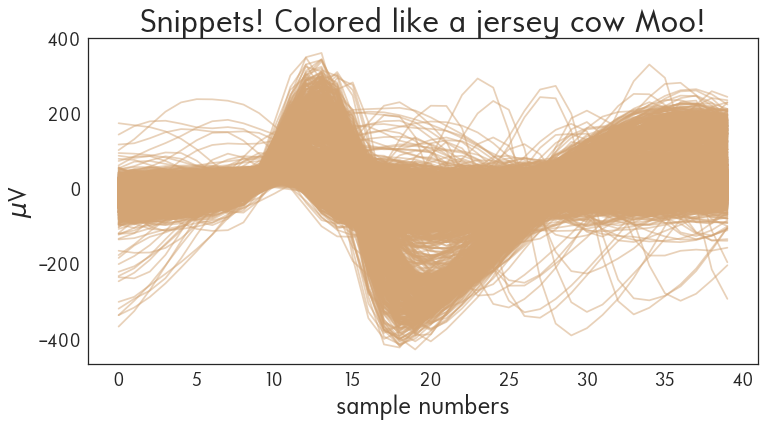

In [6]:
# Find threshold for these snippets!
i=0
while i < SpikeWaveforms.shape[0]: # let's just look at tetrode one
    plt.plot(SpikeWaveforms[i,:,0],color=npl.colors.cows.jersey,alpha=0.5) 
    i+=10
plt.xlabel("sample numbers")
plt.ylabel("$\mu$V")
plt.title("Snippets! Colored like a jersey cow Moo!")
plt.show()

Alrighty, so we've learned that the peak of the action potentials are somewhere in between 10-15 samples but what is the threshold crossing? 

As we know that at least one channel on one tetrode of each of these waveform snippets meat (yes meat...I'm hungry it's 11:30 pm so meat. specifically, I want fried chicken but no shay no...update: I had fried chicken it is now 3:13 am) threshold, if we take each snipped and look for the maximum of the 4 channels at each sample, we can find the value that meets threshold first. From this if we take the minimum of all the maximums at each sample the threshold should be revealed!

Text(0.5,1,'Minimums of maximums (infimum? idk math)')

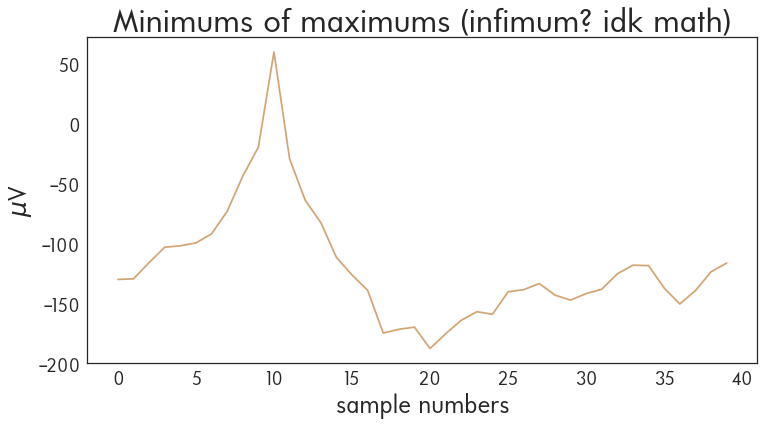

In [8]:
# now find the minimum threshold trigger!
minimums = np.min(maximums,axis=0)
plt.plot(minimums,color=npl.colors.cows.jersey)
plt.xlabel("sample numbers")
plt.ylabel("$\mu$V")
plt.title("Minimums of maximums (infimum? idk math)")

In [9]:
np.max(minimums),np.where(minimums>=60)

(60.00018620124503, (array([10]),))

So the threshold was about 60 $\mu$V (aligned to saample 10)...I now see that this is given in the raw data description above but hey fun to find it right? Good exercise. Moo. 

Now to find the post peak threshold and do the plots requested. As stated in the problem, peak occurs 5-10 samples after the threshold crossing so let's look for the max there

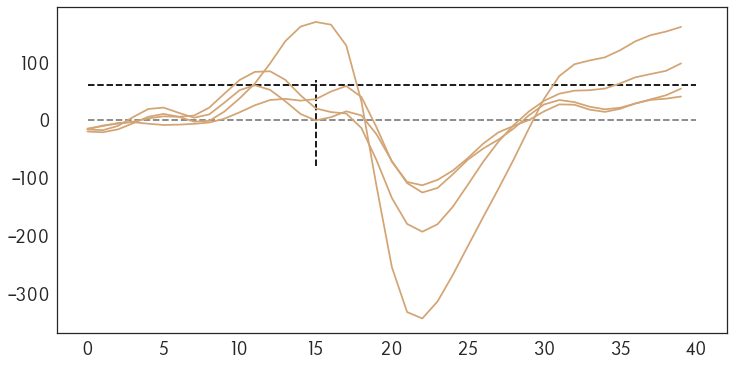

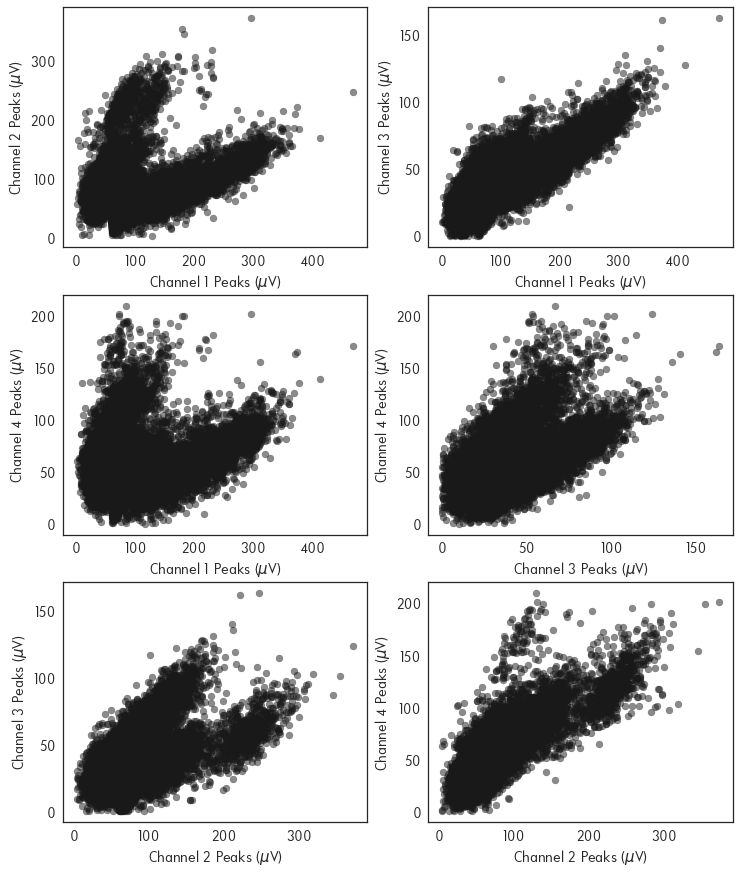

In [13]:
npl.setup(font='Universalis ADF Std', font_scale=2, palette=npl.colors.cows, style='white',\
         rc=({'figure.figsize': (12, 15), 'font.size': 18, 'axes.labelsize': 15, \
             'axes.titlesize':33, 'legend.fontsize': 20, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))

fig, axes = plt.subplots(3,2,)
npl.setup(font='Universalis ADF Std', font_scale=2, palette=npl.colors.cows, style='white',\
         rc=({'figure.figsize': (12, 15), 'font.size': 18, 'axes.labelsize': 15, \
             'axes.titlesize':33, 'legend.fontsize': 20, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))

fig, axes = plt.subplots(3,2,)

axes[0,0].scatter(peaks[:,0],peaks[:,1],alpha=0.5)
axes[0,0].set_ylabel("Channel 2 Peaks ($\mu$V)");
axes[0,0].set_xlabel("Channel 1 Peaks ($\mu$V)");

axes[0,1].scatter(peaks[:,0],peaks[:,2],alpha=0.5)
axes[0,1].set_ylabel("Channel 3 Peaks ($\mu$V)");
axes[0,1].set_xlabel("Channel 1 Peaks ($\mu$V)");

axes[1,0].scatter(peaks[:,0],peaks[:,3],alpha=0.5)
axes[1,0].set_ylabel("Channel 4 Peaks ($\mu$V)");
axes[1,0].set_xlabel("Channel 1 Peaks ($\mu$V)");

axes[1,1].scatter(peaks[:,2],peaks[:,3],alpha=0.5)
axes[1,1].set_ylabel("Channel 4 Peaks ($\mu$V)");
axes[1,1].set_xlabel("Channel 3 Peaks ($\mu$V)");

axes[2,0].scatter(peaks[:,1],peaks[:,2],alpha=0.5)
axes[2,0].set_ylabel("Channel 3 Peaks ($\mu$V)");
axes[2,0].set_xlabel("Channel 2 Peaks ($\mu$V)");

axes[2,1].scatter(peaks[:,1],peaks[:,3],alpha=0.5)
axes[2,1].set_ylabel("Channel 4 Peaks ($\mu$V)");
axes[2,1].set_xlabel("Channel 2 Peaks ($\mu$V)");
axes[0,0].scatter(peaks[:,0],peaks[:,1],alpha=0.5)
axes[0,0].set_ylabel("Channel 2 Peaks ($\mu$V)");
axes[0,0].set_xlabel("Channel 1 Peaks ($\mu$V)");

axes[0,1].scatter(peaks[:,0],peaks[:,2],alpha=0.5)
axes[0,1].set_ylabel("Channel 3 Peaks ($\mu$V)");
axes[0,1].set_xlabel("Channel 1 Peaks ($\mu$V)");

axes[1,0].scatter(peaks[:,0],peaks[:,3],alpha=0.5)
axes[1,0].set_ylabel("Channel 4 Peaks ($\mu$V)");
axes[1,0].set_xlabel("Channel 1 Peaks ($\mu$V)");

axes[1,1].scatter(peaks[:,2],peaks[:,3],alpha=0.5)
axes[1,1].set_ylabel("Channel 4 Peaks ($\mu$V)");
axes[1,1].set_xlabel("Channel 3 Peaks ($\mu$V)");

axes[2,0].scatter(peaks[:,1],peaks[:,2],alpha=0.5)
axes[2,0].set_ylabel("Channel 3 Peaks ($\mu$V)");
axes[2,0].set_xlabel("Channel 2 Peaks ($\mu$V)");

axes[2,1].scatter(peaks[:,1],peaks[:,3],alpha=0.5)
axes[2,1].set_ylabel("Channel 4 Peaks ($\mu$V)");
axes[2,1].set_xlabel("Channel 2 Peaks ($\mu$V)");

# Problem 2

_Clustering with K-Means (40 pts)_


Note that SciPy has an implementation of K-means. For this assignment,
however, you are to implement your own version of it. Use your
implementation to determine the neuron responsible for each recorded spike.
Use only the data from the first channel of the tetrode. You may only use
basic  NumPy commands, i.e. linear algebra and functions that you would find
on a graphing calculator. Treat each snippet as a point in  $$\mathbf{x}_m
\in \mathbb{R}^D, \, m\in \lbrace 1, 2, \ldots M \rbrace$$, where $$D$$ is
40, the length of each snippet, and $$M$$ is the  total number of snippets.
In this problem, we will assume there are $$K = 3$$ neurons contributing
spikes to the recorded waveform. For computational simplicity, use only the
first 2000 snippets ($$M = 2000$$).


**a.** For each cluster (_k_ = 1, 2, 3), create a separate "voltage versus
time" plot containing the following:

* the cluster center $$\boldsymbol \mu_k$$ generated by K-Means as a red
waveform trace (i.e., the prototypical action potential for the _k_-th
neuron and

* all of the waveform snippets assigned to the _k_-th cluster

**b.** Plot the objective number $$J$$ versus iteration number (as in Figure
9.2 in _PRML_). How many iterations did it take for K-Means to converge?

**c.** Repeat the problem with K = 4 clusters.


__Okay, I'm not really gonna do this problem. There should be clear distinct clusters and objective function should decrecase exponentially then flatten. Just looking for a discussion and comparison__

# Problem 4
 _Using Gaussian Mixtures (50 pts)_

    In python, the scikit-learn package has nice support for mixture models.

   ```python
   from sklearn import mixture
   gmix = mixture.GMM(n_components=2, covariance_type='full')
   gmix.fit(peaks)
   ```

You will use this package to define and train a model of the 4-channel
waveform peaks. To make this problem more interesting, load data from the
file [SpikeData12.npz](SpikeData12.npz)
([SpikeData12.mat](SpikeData12.mat)), and find the waveform peaks as in
**(1)**.

## load up data & find peaks

In [14]:
data=np.load("SpikeData12.npz")
data.files

['SpikeWaveforms']

In [15]:
SpikeWaveforms = data['SpikeWaveforms']

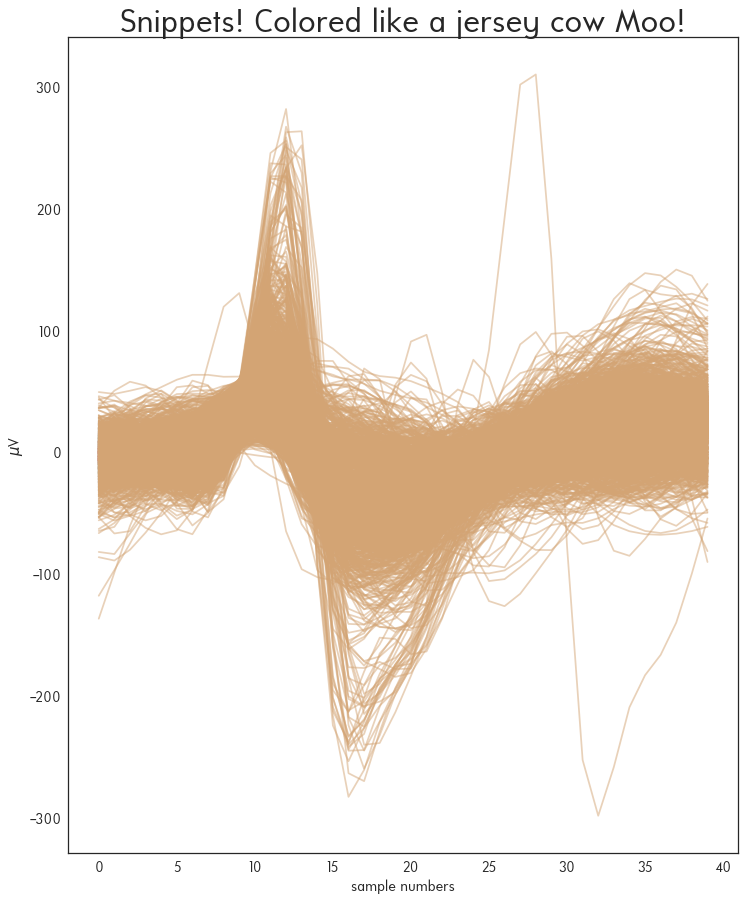

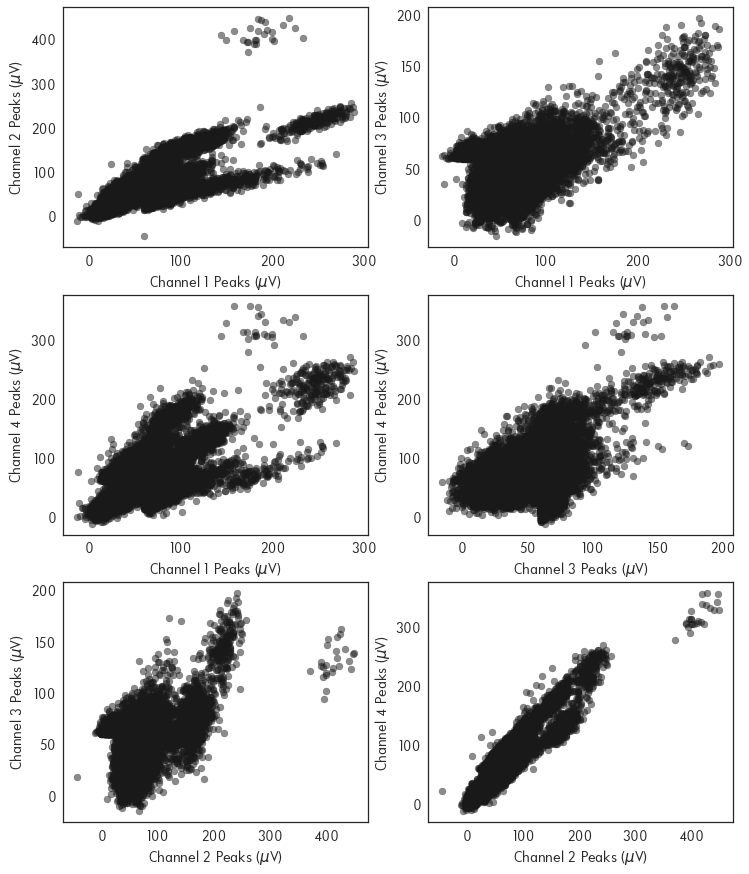

## Part a
**a.** Use the first 5000 snippet-peaks (i.e., $$\mathbf{x}_n \in
    \mathcal{R}^4$$ are the peak of the spike snippet in each tetrode channel
    for $ n = 1, \ldots 5000$ snippets), and learn the Gaussian mixture
    parameters for $$K=10$$ neurons. Plot the resulting cluster assignments in a
    six panel plot as in **(2)** with the clusters color-coded. [A well
    documented example can be found in from the scikit-learn docs](
    http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py).


In [21]:
from sklearn import mixture
gmix = mixture.GaussianMixture(n_components=10, covariance_type='full') # gmix (gangsta mix :D)
gangstaMixLabels = gmix.fit(peaks[0:5000,:]).predict(peaks[0:5000,:])

In [22]:
gangstaMixLabels.shape

(5000,)

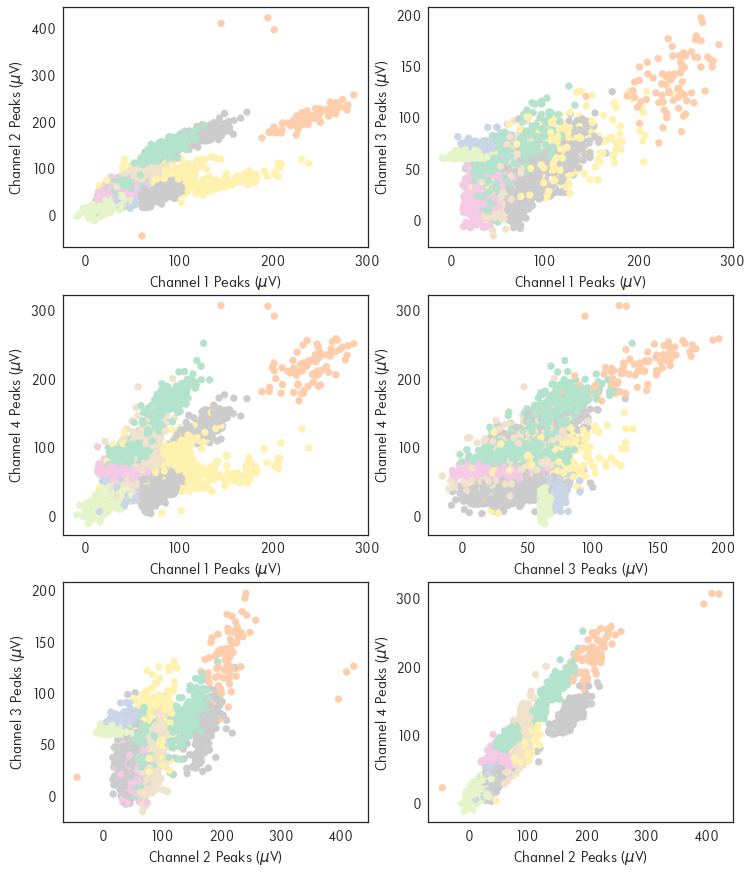

## Part b
**b.**  Find the cluster assignments for the next 5000 snippet-peaks. You will use these as
    test data to evaluate how many clusters there should be in the data. Calculate the model
    likelihood of the second set of 5000 snippet-peaks using the parameters you found in
    **(a)**. Now, repeat the EM-learning in **(a)**, but with $$K = 8, 9, \ldots,
    20$$. What is the likelihood of the test data for each model? Which model
    would you use if you wanted only well-clustered neurons for your analysis?
    For the most likely value of $$K$$, plot the cluster assignments as in (a).

In [24]:
from tqdm import tqdm

100%|██████████| 13/13 [00:05<00:00,  2.27it/s]

Which K value to use:  14


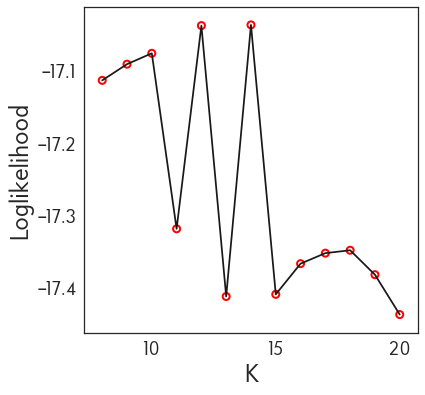

__We can run & probably should run this multiple times and there's some variablity in terms of what should be used due to the random init.__

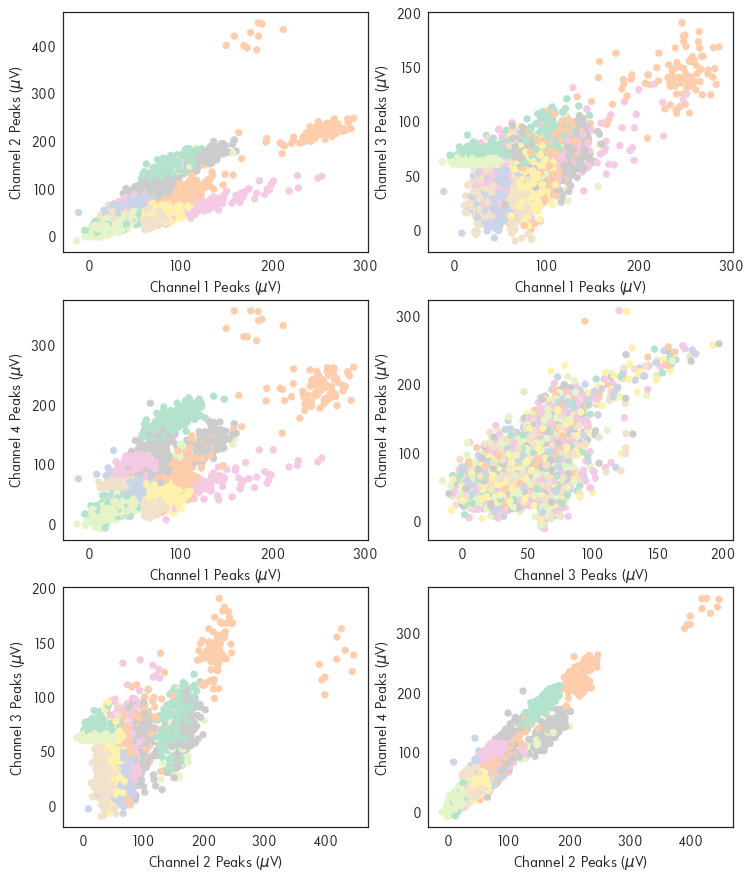